# World Happiness Report

Problem Statement:

Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df=pd.read_csv(url)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# checking null values

In [4]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Encoding DataFrame

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Visualization of Dataset

In [11]:
df.dtypes

Country                            int64
Region                             int64
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='Country', ylabel='Count'>

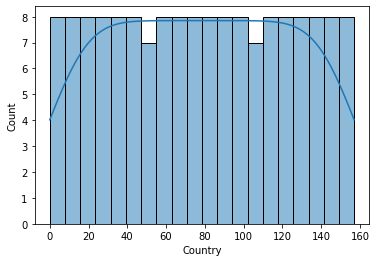

In [13]:
sns.histplot(x='Country',data=df,bins=20,kde=True)

8    40
1    29
3    22
9    21
4    20
6     9
7     7
2     6
5     2
0     2
Name: Region, dtype: int64


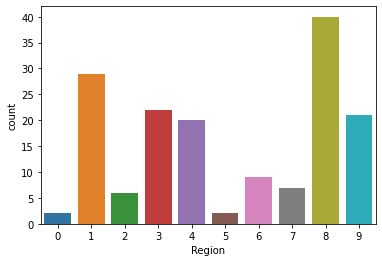

In [15]:
sns.countplot(x='Region',data=df)
print(df['Region'].value_counts())

<AxesSubplot:xlabel='Happiness Rank', ylabel='Count'>

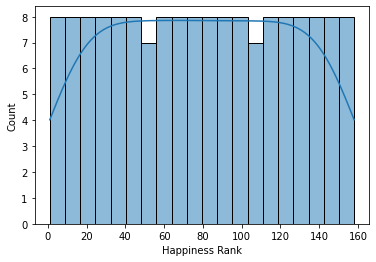

In [16]:
sns.histplot(x='Happiness Rank',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Happiness Score', ylabel='Count'>

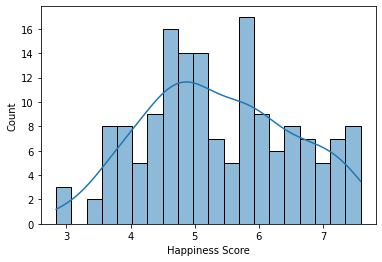

In [17]:
sns.histplot(x='Happiness Score',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Standard Error', ylabel='Count'>

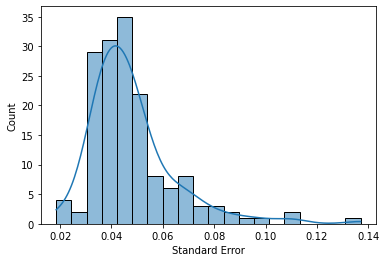

In [18]:
sns.histplot(x='Standard Error',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Count'>

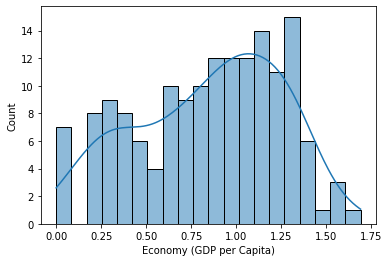

In [19]:
sns.histplot(x='Economy (GDP per Capita)',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Family', ylabel='Count'>

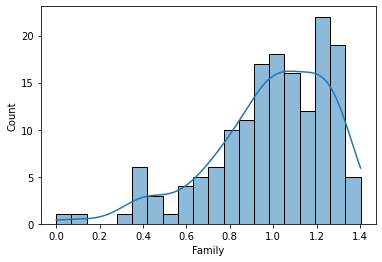

In [20]:
sns.histplot(x='Family',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Count'>

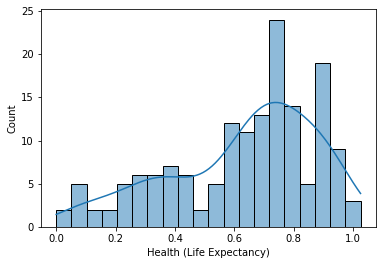

In [21]:
sns.histplot(x='Health (Life Expectancy)',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Freedom', ylabel='Count'>

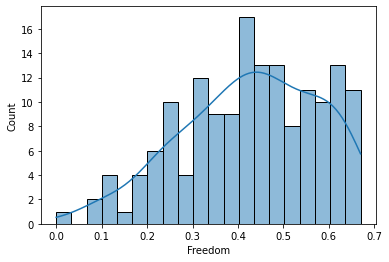

In [22]:
sns.histplot(x='Freedom',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Count'>

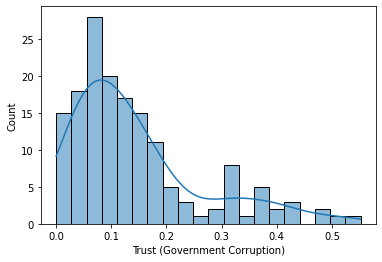

In [23]:
sns.histplot(x='Trust (Government Corruption)',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Generosity', ylabel='Count'>

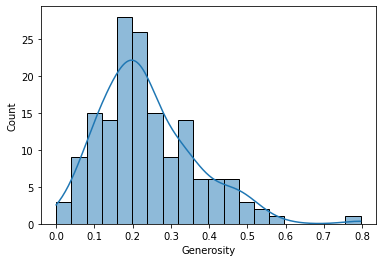

In [24]:
sns.histplot(x='Generosity',data=df,bins=20,kde=True)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Count'>

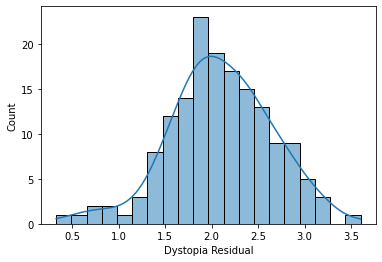

In [25]:
sns.histplot(x='Dystopia Residual',data=df,bins=20,kde=True)

# Describing Dataset

In [26]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [27]:
import matplotlib.pyplot as plt

<AxesSubplot:>

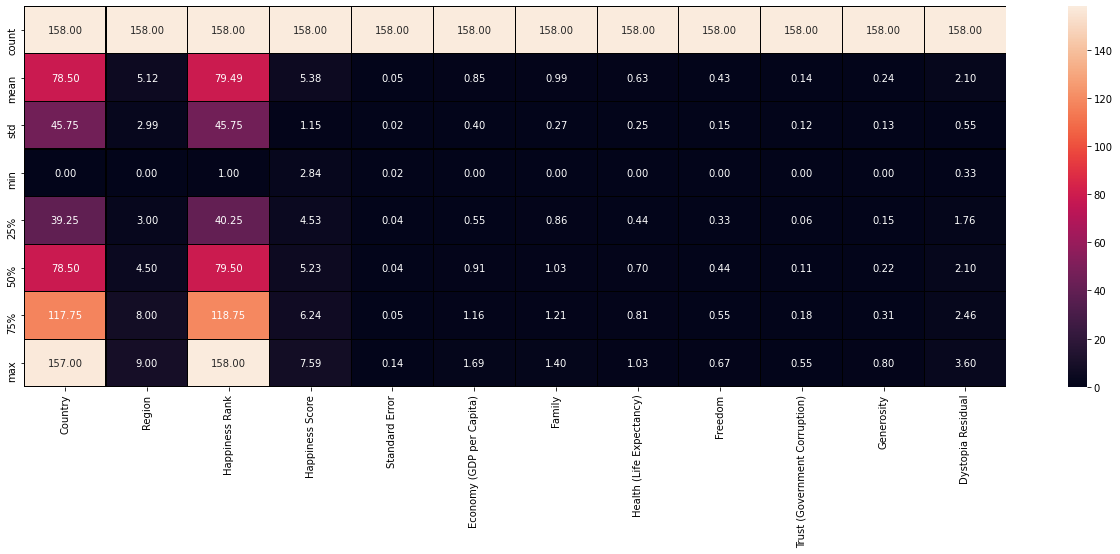

In [29]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='Black',fmt='0.2f')

In [30]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

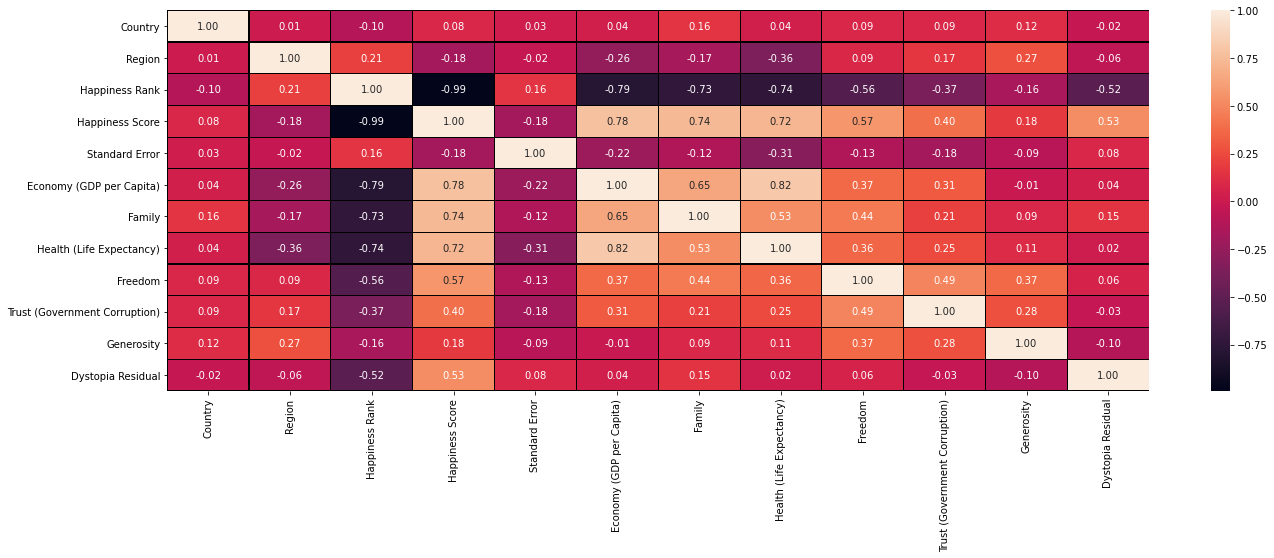

In [31]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='Black',fmt='0.2f')

# Checking Outliers

In [32]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Considering -/+ 0.5 as the threshold

<AxesSubplot:>

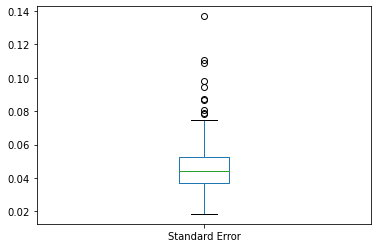

In [33]:
df['Standard Error'].plot.box()

<AxesSubplot:>

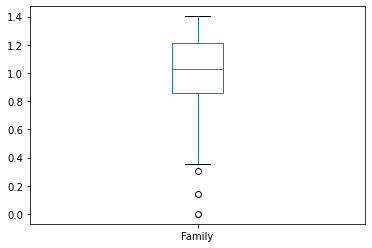

In [34]:
df['Family'].plot.box()

<AxesSubplot:>

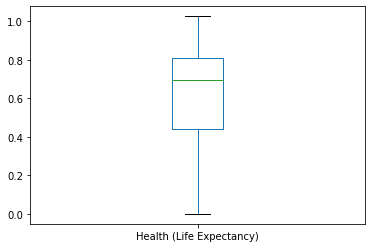

In [36]:
df['Health (Life Expectancy)'].plot.box()

<AxesSubplot:>

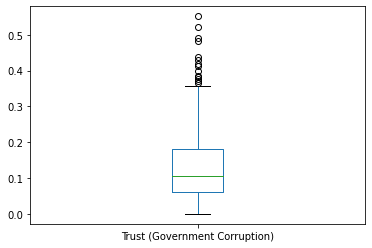

In [37]:
df['Trust (Government Corruption)'].plot.box()

<AxesSubplot:>

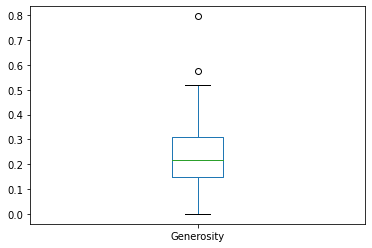

In [38]:
df['Generosity'].plot.box()

# Outliers Removal

In [39]:
from scipy.stats import zscore

In [40]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157]),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6]))

In [41]:
df=df[(z<3).all(axis=1)]
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [42]:
Data_loss=((158-149)/158)*100
Data_loss

5.69620253164557

# Separating into x and y

In [43]:
x=df.drop('Dystopia Residual',axis=1)
y=df['Dystopia Residual']

# Transforming Dataset

In [44]:
from sklearn.preprocessing import power_transform


In [45]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.75498235,
         1.81762512,  0.65957854],
       [-0.30048669,  1.23451354, -1.99584442, ...,  1.44218196,
         0.32967609,  1.56260401],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.61603681,
         1.95339954,  0.97722591],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -1.26539515,
        -0.19284338,  1.13425805],
       [-1.50728158,  0.95527966,  1.56626337, ...,  0.31812329,
        -0.4344978 , -0.31207994],
       [-1.24683102,  0.95527966,  1.60111233, ..., -1.84989334,
        -0.14727362, -0.17248609]])

# Scaling Data

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.75498235,
         1.81762512,  0.65957854],
       [-0.30048669,  1.23451354, -1.99584442, ...,  1.44218196,
         0.32967609,  1.56260401],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.61603681,
         1.95339954,  0.97722591],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -1.26539515,
        -0.19284338,  1.13425805],
       [-1.50728158,  0.95527966,  1.56626337, ...,  0.31812329,
        -0.4344978 , -0.31207994],
       [-1.24683102,  0.95527966,  1.60111233, ..., -1.84989334,
        -0.14727362, -0.17248609]])

# Model Selection

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [48]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state{i},the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state{i},the training accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')

At random state0,the training accuracy is :- 0.975155030154155
At random state0,the training accuracy is :- 0.976951241991439


At random state1,the training accuracy is :- 0.9734908822562738
At random state1,the training accuracy is :- 0.9843678709552348


At random state2,the training accuracy is :- 0.9796190911788749
At random state2,the training accuracy is :- 0.9598141435707792


At random state3,the training accuracy is :- 0.9765028364874028
At random state3,the training accuracy is :- 0.9703083604428625


At random state4,the training accuracy is :- 0.9762781744179896
At random state4,the training accuracy is :- 0.9682189105235997


At random state5,the training accuracy is :- 0.9804541885175309
At random state5,the training accuracy is :- 0.9204168950502803


At random state6,the training accuracy is :- 0.9798001524470749
At random state6,the training accuracy is :- 0.9330470947985602


At random state7,the training accuracy is :- 0.9722522574069903
At random state7,the trainin

In [49]:
pred_test=lr.predict(x_test)

In [50]:
pred_test

array([1.00060485, 2.18604648, 3.02261042, 1.86408379, 2.41354416,
       1.74360682, 1.98750413, 1.87977314, 2.76954091, 2.16463319,
       1.7087204 , 2.379369  , 1.94332116, 1.21464126, 1.47946375,
       1.9718827 , 2.0814488 , 2.29995825, 2.73562157, 1.66083951,
       1.35811473, 2.27340048, 1.82077605, 1.94926555, 2.37039197,
       2.5007346 , 1.5663988 , 1.79943385, 1.96189546, 2.07842124])

In [51]:
print(r2_score(y_test,pred_test))

0.935728071005277


# Cross-Validation of the Model

In [52]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f' At cross fold{j} the cv score is {cv_mean} and the accuracy score for training is {Train_accuracy} and the accuracy score testing is {Test_accuracy}' )
    print('\n')

 At cross fold2 the cv score is 0.5370275498756576 and the accuracy score for training is 0.9804630415963831 and the accuracy score testing is 0.935728071005277


 At cross fold3 the cv score is 0.8086675297431732 and the accuracy score for training is 0.9804630415963831 and the accuracy score testing is 0.935728071005277


 At cross fold4 the cv score is 0.8638136215526394 and the accuracy score for training is 0.9804630415963831 and the accuracy score testing is 0.935728071005277


 At cross fold5 the cv score is 0.8649664804196131 and the accuracy score for training is 0.9804630415963831 and the accuracy score testing is 0.935728071005277


 At cross fold6 the cv score is 0.9053925779752493 and the accuracy score for training is 0.9804630415963831 and the accuracy score testing is 0.935728071005277


 At cross fold7 the cv score is 0.9037975450909688 and the accuracy score for training is 0.9804630415963831 and the accuracy score testing is 0.935728071005277


 At cross fold8 the cv

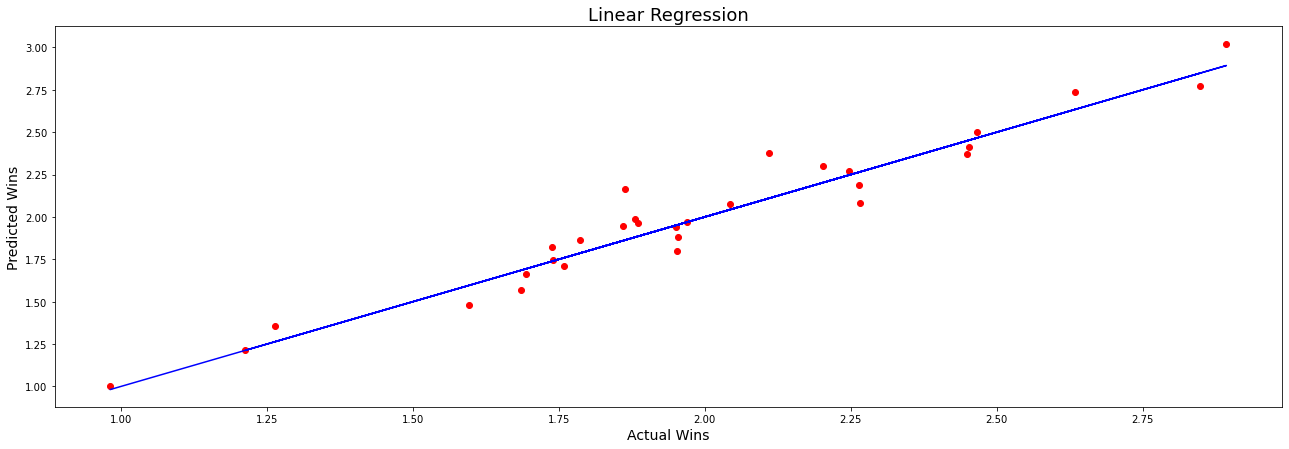

In [53]:
plt.figure(figsize=(22,7))
plt.scatter(x=y_test,y=pred_test,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [55]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [56]:
ls=Lasso(alpha=0.001, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9380573780335943

In [57]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8841466654812911

# Ensemble Technique

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [59]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score :',rfs*100)

rfscore= cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score :',rfc*100)

R2 score : 53.812094519999256
Cross Val Score : -59.18106678095738


# Saving the Model

In [60]:
import pickle
filename='WorldHappiness.pk1'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:-

In [61]:
loaded_model=pickle.load(open('WorldHappiness.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.5381209451999925


In [62]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Predicted,1.669533,2.56063,2.454823,2.075989,2.411975,1.898717,1.934492,1.894001,2.634234,1.659109,...,1.58872,2.222982,2.300854,1.90333,2.202388,2.316516,2.179315,1.986624,2.019556,2.121489
Original,1.669533,2.56063,2.454823,2.075989,2.411975,1.898717,1.934492,1.894001,2.634234,1.659109,...,1.58872,2.222982,2.300854,1.90333,2.202388,2.316516,2.179315,1.986624,2.019556,2.121489
